**Electronic Store dataset Analysis**



---



This blog has a dataset from a store. I will answer two business questions based on the data from this dataset. I get this data from this website: https://shortest.link/2Si6

I will start by importing the required libraries.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

Reading the dataset

In [3]:
df = pd.read_csv("Sales_January_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
df.shape

(9723, 6)

Checking the Null values

In [9]:
check_null1 = df.isnull().sum()
check_null1

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

* **The first question is What is the daily sales in January 2019 and what is the highest day of sales?**

First I will extract the Day from the Order Date column and will create a new column in the dataframe.

In [11]:
df['Day']= df['Order Date'].str[3:5]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25


Then I will check if there is a null value at the Day column.

In [12]:
check_null = df[df['Day'].isnull()]
check_null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The number of null values at the Day column is shown below.

In [13]:
check_null.shape

(26, 7)

Now, I will drop the null records of those who have null values at the Day column

In [14]:
df.dropna(subset=['Day'], inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25


This code shows that no null values at the Day column

In [15]:
df.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Day                 0
dtype: int64

I would like to check the values at the Day column before I answer the question about the daily sales of January 2019. I found that there are some values other than numeric.

In [16]:
df['Day'].unique()

array(['22', '28', '17', '05', '25', '29', '26', '01', '07', '31', '09',
       '03', '10', '24', '30', '08', '12', '19', '20', '16', '11', '02',
       '14', '27', '21', '13', '18', '06', '04', '23', '15', 'er'],
      dtype=object)

Drop the values of 'er' so I can deal with the Day column in the analysis

In [17]:
df = df[df['Day'].str[0:2]!='er']
df['Day'].unique()

array(['22', '28', '17', '05', '25', '29', '26', '01', '07', '31', '09',
       '03', '10', '24', '30', '08', '12', '19', '20', '16', '11', '02',
       '14', '27', '21', '13', '18', '06', '04', '23', '15'], dtype=object)

Here I will convert the Day column to integer so I can apply sum function

In [ ]:
df['Day']= df['Day'].astype('int32')

Here I will convert the Quantity Ordered and Price Each columns to numeric so I can apply some functions such as multiplication.

In [ ]:
df['Quantity Ordered'] =pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] =pd.to_numeric(df['Price Each'])

To get the sales, I will multiply the Quantity Ordered by Price Each

In [ ]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']


In [22]:

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",5,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,11.99


Here I will group the daily sales

In [23]:
df.groupby('Day').sum()

,Quantity Ordered,Price Each,Sales
Day,,,
1,349,67169.59,67430.62
2,368,70407.84,70813.20
3,330,46793.74,47046.20
4,330,61779.51,62012.21
5,355,46160.62,46524.63
6,319,52500.25,52777.49
7,343,53493.66,53676.42
8,318,55868.09,56112.47
9,357,54944.27,55153.13


Plotting the daily sales to show the higest day was at the January 11, 2019

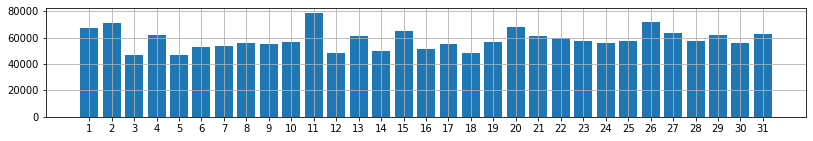

In [24]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
Day = range(1,32)
results = df.groupby('Day').sum()
plt.bar(Day, results['Sales'])
ax.set_xticks(np.arange(1, 32))
plt.gcf().set_size_inches(30,2)
plt.grid()
plt.show()

* **The second question is what the order of the Products sold?**   

In [25]:
df1 = df['Product'].value_counts()
df1

USB-C Charging Cable          1171
AAA Batteries (4-pack)        1082
Lightning Charging Cable      1068
AA Batteries (4-pack)         1039
Wired Headphones              1005
Apple Airpods Headphones       809
Bose SoundSport Headphones     656
27in FHD Monitor               418
iPhone                         379
Google Phone                   317
34in Ultrawide Monitor         313
27in 4K Gaming Monitor         312
Flatscreen TV                  243
Macbook Pro Laptop             235
ThinkPad Laptop                216
20in Monitor                   213
Vareebadd Phone                124
LG Washing Machine              42
LG Dryer                        39
Name: Product, dtype: int64

Plotting the order of the products sold. The plot shows that the *USB-C Charching Cable* is the highest product sold 

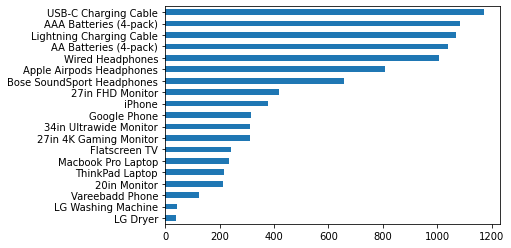

In [26]:
df.Product.value_counts().sort_values().plot(kind ='barh')

**Conclusion**

I used Python to answer two bussiness question from an electronic dataset. The solutions show that the January 11, 2019 has the highest sales. Also, The USB-C Charching Cable is the highest product sold in January 2019. In addition the last plot shows the products sold in order. Thus this store has an idea now about the movement of the products sold. The owner of the store can take decisions to advertise or make prmotions to sell the least sold products fro example.